In [14]:
import torch
print(torch.__version__)
from torch_geometric.data import Data
import networkx as nx
from torch_geometric.utils.convert import to_networkx

1.13.0.dev20220712


In [13]:
# !pip install torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric -f https://data.pyg.org/whl/torch-1.12.0+cpu.html
# !pip install networkx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 4.1 MB/s eta 0:00:0000:0100:01


In [4]:
# Create graph with randomly selected numbers

# graph with 4 nodes
edge_list = torch.tensor([
    [0, 0, 0, 1, 2, 2, 3, 3], # source nodes
    [1, 2, 3, 0, 0, 3, 2, 0] # target nodes
], dtype = torch.long)

# 6 features for each node 4x6 -> number of nodes x number of features
node_features = torch.tensor([
    [-8, 1, 5, 8 ,2, -3], # features of node 0
    [-1, 0, 2, -3, 0, 1], # features of node 1
    [1, -1, 0, -1, 2, 1], # features of node 2
    [0, 1, 4, -2, 3, 4], # features of node 3
], dtype = torch.long)

# 1 weight for each edge
edge_weight = torch.tensor([
    [35.], # weight for nodes (0,1)
    [48.], # weight for nodes (0,2)
    [12.], # weight for nodes (0,3)
    [10.], # weight for nodes (1,0)
    [70.], # weight for nodes (2,0)
    [5.], # weight for nodes (2,3)
    [15.], # weight for nodes (3,2)
    [8.], # weight for nodes (3,0)
], dtype = torch.long)

edge_list, node_features, edge_weight

/var/folders/tm/lmhqcfxj7sd9mp5ws42m_s3m0000gn/T/ipykernel_29920/2615175618.py:16: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  edge_weight = torch.tensor([


(tensor([[0, 0, 0, 1, 2, 2, 3, 3],
         [1, 2, 3, 0, 0, 3, 2, 0]]),
 tensor([[-8,  1,  5,  8,  2, -3],
         [-1,  0,  2, -3,  0,  1],
         [ 1, -1,  0, -1,  2,  1],
         [ 0,  1,  4, -2,  3,  4]]),
 tensor([[35],
         [48],
         [12],
         [10],
         [70],
         [ 5],
         [15],
         [ 8]]))

In [6]:
# Make a data object to store graph information
data = Data(x = node_features, edge_index = edge_list, edge_attr = edge_weight)
data

Data(x=[4, 6], edge_index=[2, 8], edge_attr=[8, 1])

In [11]:
print("Number of nodes: ", data.num_nodes)
print("Number of edges: ", data.num_edges)
print("Number of features per node(length of feature vector): ", data.num_node_features)
print("Number of weights per edge(edge features): ", data.num_edge_features)

Number of nodes:  4
Number of edges:  8
Number of features per node(length of feature vector):  6
Number of weights per edge(edge features):  1


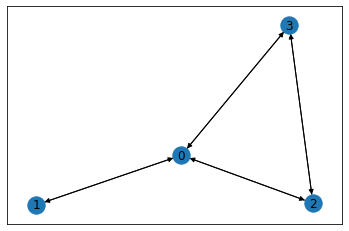

In [17]:
G = to_networkx(data)
nx.draw_networkx(G)